# Basic implementation of SVM with kernel trick
sources:
- https://machinelearningmastery.com/support-vector-machines-for-machine-learning/

## SVM (Support Vector Machine)

- supervised machine learning classification algorithm
- it chooses the decision boundary that maximizes the distance from the nearest data points of all the classes

## SVM usefulness
https://datamites.com/blog/support-vector-machine-algorithm-svm-understanding-kernel-trick/

### Advantages of Support Vector Machine

- Training of the model is relatively easy
- The model scales relatively well to high dimensional data
- SVM is a useful alternative to neural networks
- Trade-off amongst classifier complexity and error can be controlled explicitly
- It is useful for both Linearly Separable and Non-linearly Separable data
- Assured Optimality: The solution is guaranteed to be the global minimum due to the nature of Convex Optimization

### Disadvantages of Support Vector Machine

- Picking right kernel and parameters can be computationally intensive
- In Natural Language Processing (NLP), a structured representation of text yields better performance. However, SVMs cannot accommodate such structures(word embedding)


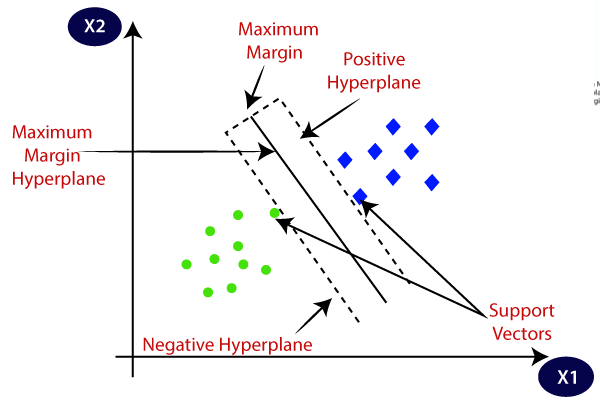

In [4]:
# visualisation of svm components
from IPython.display import Image
Image(filename="img/svm.png", width=600)

## Kernel trick
https://datamites.com/blog/support-vector-machine-algorithm-svm-understanding-kernel-trick/
- a method of placing a two dimensional plane into a higher dimensional space, so that it is curved in the higher dimensional space

## How kernel trick is applied in SVM
- for a non-linear data SVM finds it difficult to classify the data. The easy solution here is to use the Kernel Trick
- non-linear data is projected onto a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane

# Implementation with scikit-learn library
source of code: https://www.freecodecamp.org/news/svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples/

## SVM for linear data

In [5]:
### imports libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [6]:
# linear dummy data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

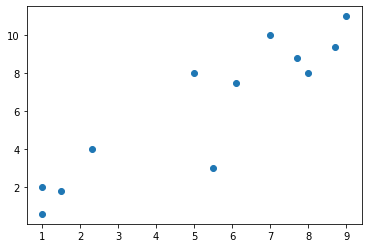

In [7]:
# plots unclassified data
plt.scatter(X, y)
plt.show()

In [8]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [11]:
training_X

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ],
       [ 7. , 10. ],
       [ 8.7,  9.4],
       [ 2.3,  4. ],
       [ 5.5,  3. ],
       [ 7.7,  8.8],
       [ 6.1,  7.5]])

In [13]:
# define the model
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf = svm.SVC(kernel='linear', C=1.0)

In [15]:
# fits model
clf.fit(training_X, training_y)

SVC(kernel='linear')

In [18]:
# Weights assigned to the features (coefficients in the primal problem).
# This is only available in the case of a linear kernel.
clf.coef_

array([[0.1332713 , 0.42667492]])

In [19]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

In [20]:
# get the y-offset for the linear equation
a = -w[0] / w[1]

In [21]:
# make the x-axis space for the data points
XX = np.linspace(0, 13)

In [22]:
# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

No handles with labels found to put in legend.


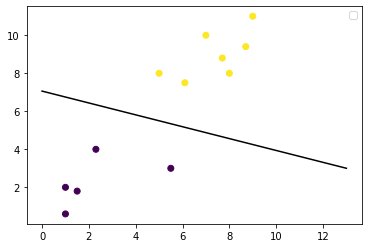

In [25]:
# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()